In [1]:
from functions import *

warnings.filterwarnings("ignore")
# from sklearnex import patch_sklearn
# patch_sklearn()


In [2]:
original_df = pd.read_csv("Dataset/smoking.csv")
original_df.drop(columns=['ID'],inplace=True)
original_df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
original_df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

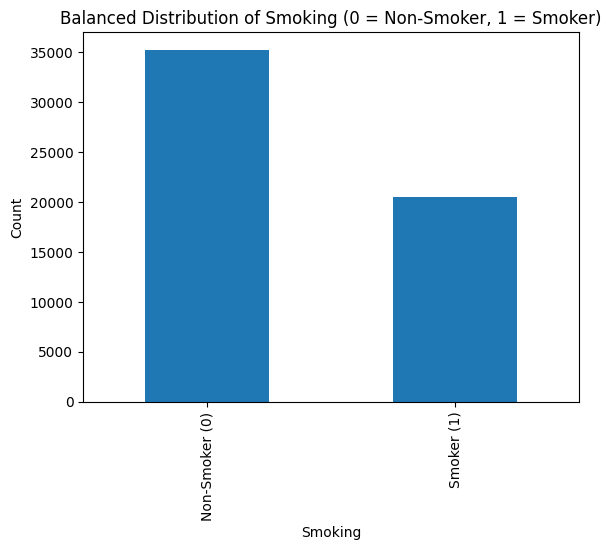

In [4]:
smoking_counts = original_df['smoking'].value_counts()

y_label_bar_graph(smoking_counts)

Balancing the Dataset

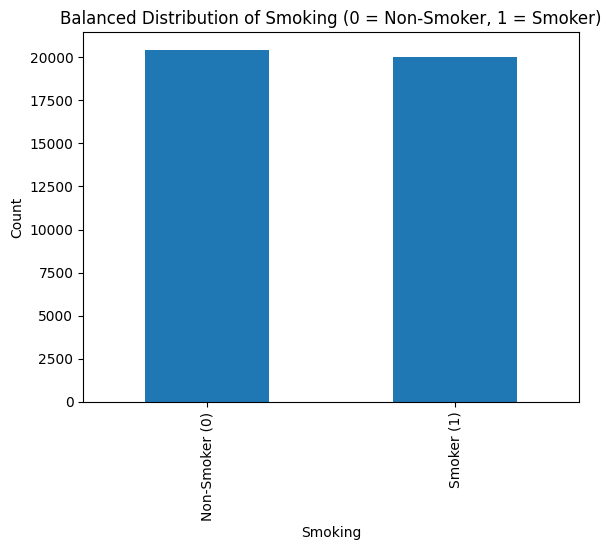

In [5]:
non_smokers = original_df[original_df['smoking'] == 0]
smokers = original_df[original_df['smoking'] == 1]

# Randomly selecting 20,000 non-smokers
non_smokers_sampled = non_smokers.sample(n=20000, random_state=42)

# Combine the sampled non-smokers with the original smokers
df = pd.concat([non_smokers_sampled, smokers])
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffling

y_label_bar_graph(df['smoking'].value_counts())


In [6]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,M,60,165,70,83.0,0.9,0.7,1.0,1.0,122.0,...,15.4,1.0,1.1,41.0,77.0,479.0,Y,0,Y,0
1,M,30,170,70,83.0,0.4,0.5,1.0,1.0,102.0,...,13.9,1.0,0.7,40.0,35.0,11.0,Y,0,N,0
2,M,60,165,60,80.0,1.2,0.9,1.0,1.0,171.0,...,15.0,1.0,1.2,17.0,16.0,23.0,Y,0,Y,0
3,M,20,170,75,81.2,1.0,1.0,1.0,1.0,121.0,...,16.2,1.0,0.9,47.0,28.0,22.0,Y,1,N,1
4,M,55,165,60,82.0,1.2,0.9,1.0,1.0,120.0,...,15.2,1.0,1.2,20.0,20.0,24.0,Y,0,N,1


# Data Cleaning

Dropping the column "oral" since every entry is Y

In [7]:
original_df['oral'].value_counts()

Y    55692
Name: oral, dtype: int64

In [8]:
df.drop(columns="oral",inplace = True)
original_df.drop(columns="oral",inplace = True)
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,M,60,165,70,83.0,0.9,0.7,1.0,1.0,122.0,...,134.0,15.4,1.0,1.1,41.0,77.0,479.0,0,Y,0
1,M,30,170,70,83.0,0.4,0.5,1.0,1.0,102.0,...,107.0,13.9,1.0,0.7,40.0,35.0,11.0,0,N,0
2,M,60,165,60,80.0,1.2,0.9,1.0,1.0,171.0,...,83.0,15.0,1.0,1.2,17.0,16.0,23.0,0,Y,0
3,M,20,170,75,81.2,1.0,1.0,1.0,1.0,121.0,...,126.0,16.2,1.0,0.9,47.0,28.0,22.0,1,N,1
4,M,55,165,60,82.0,1.2,0.9,1.0,1.0,120.0,...,160.0,15.2,1.0,1.2,20.0,20.0,24.0,0,N,1


In [9]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features.append("smoking")
categorical_features

['gender', 'tartar', 'smoking']

In [10]:
numerical_features = df.columns.tolist()
for i in numerical_features:
    if i in categorical_features:
        numerical_features.remove(i)

numerical_features.remove("smoking")
numerical_features

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries']

# Exploratory Data Analysis

## Correlation Heatmap

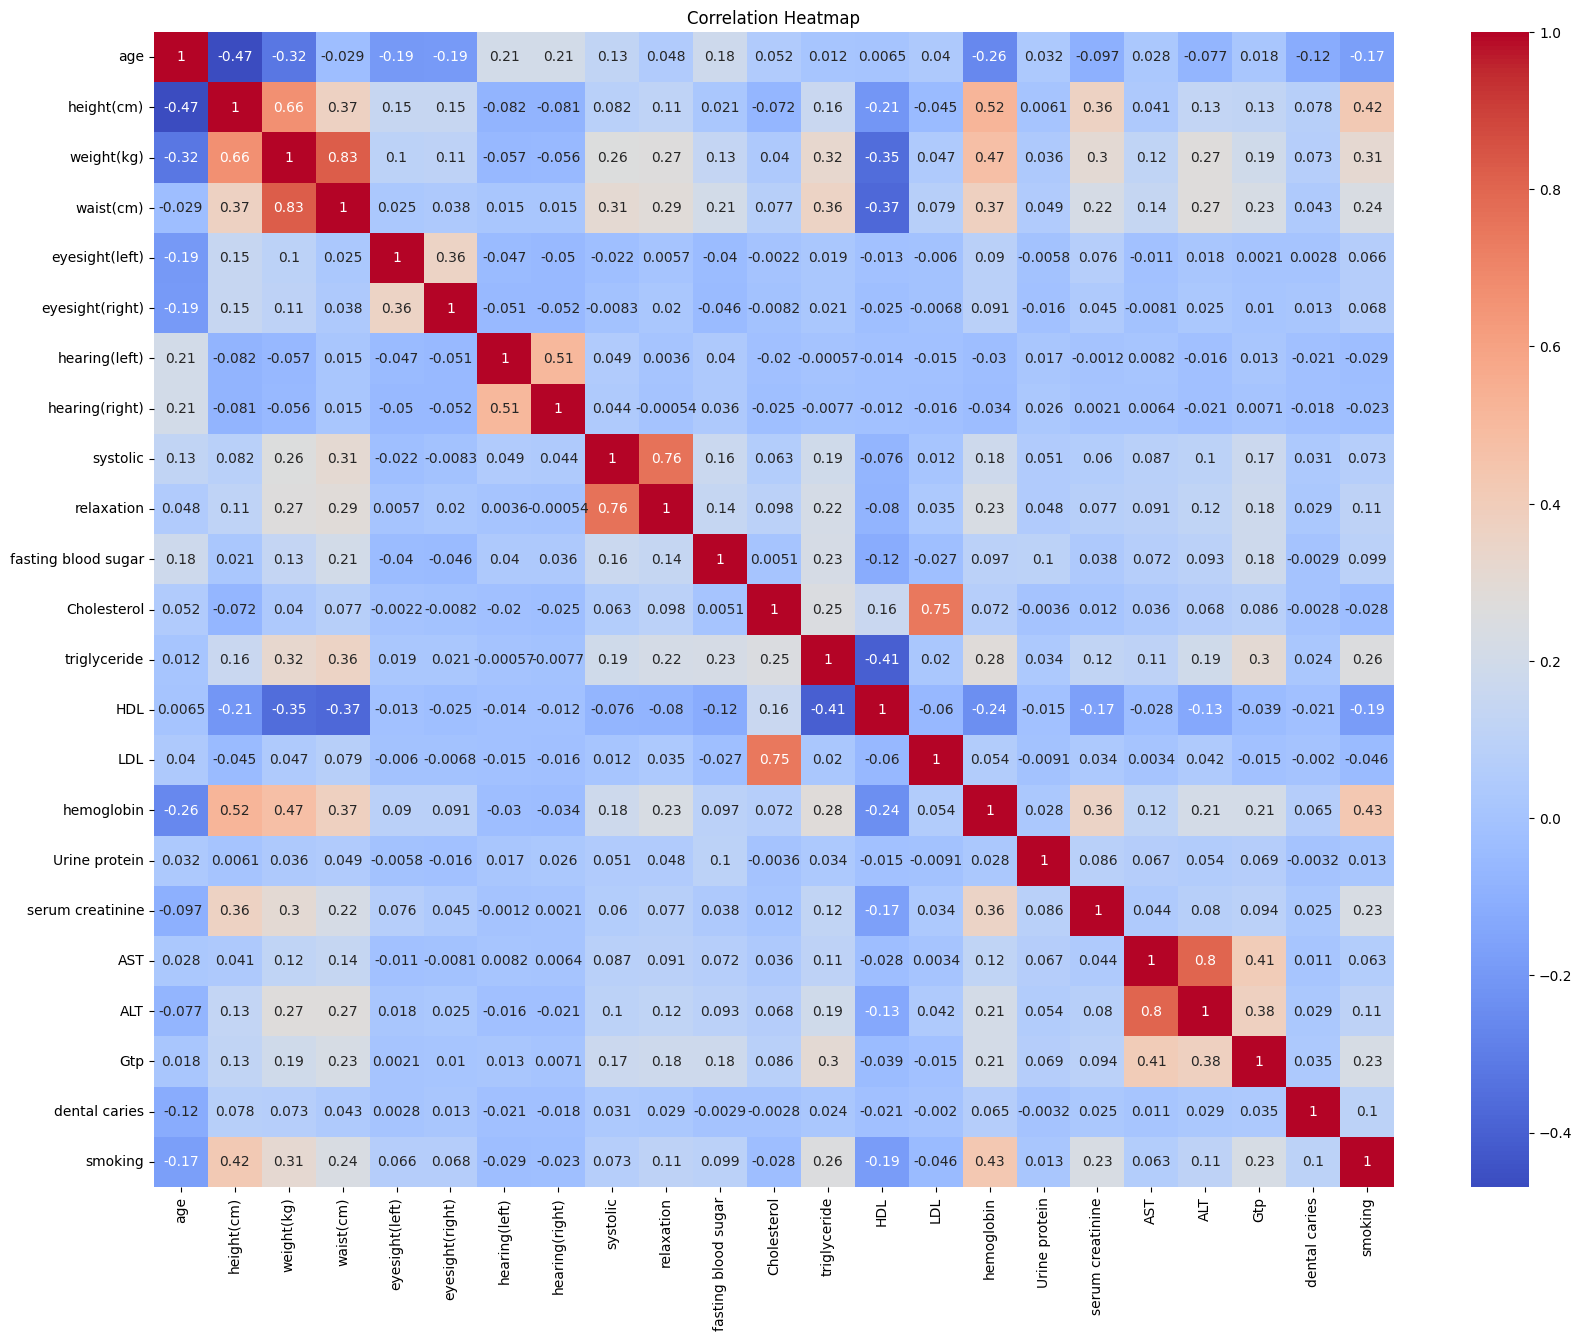

In [11]:
plt.figure(figsize=(20, 15))
numeric_data = df.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
df_without_smoking = df.drop(columns=['smoking'])

## Pair Plot

In [13]:
# plt.figure(figsize=(20, 15))
# sns.pairplot(df, hue='smoking', palette='coolwarm')
# plt.suptitle('Pairplot of Features Colored by Smoking Status', y=1.02)
# plt.show() 

## Box Plot

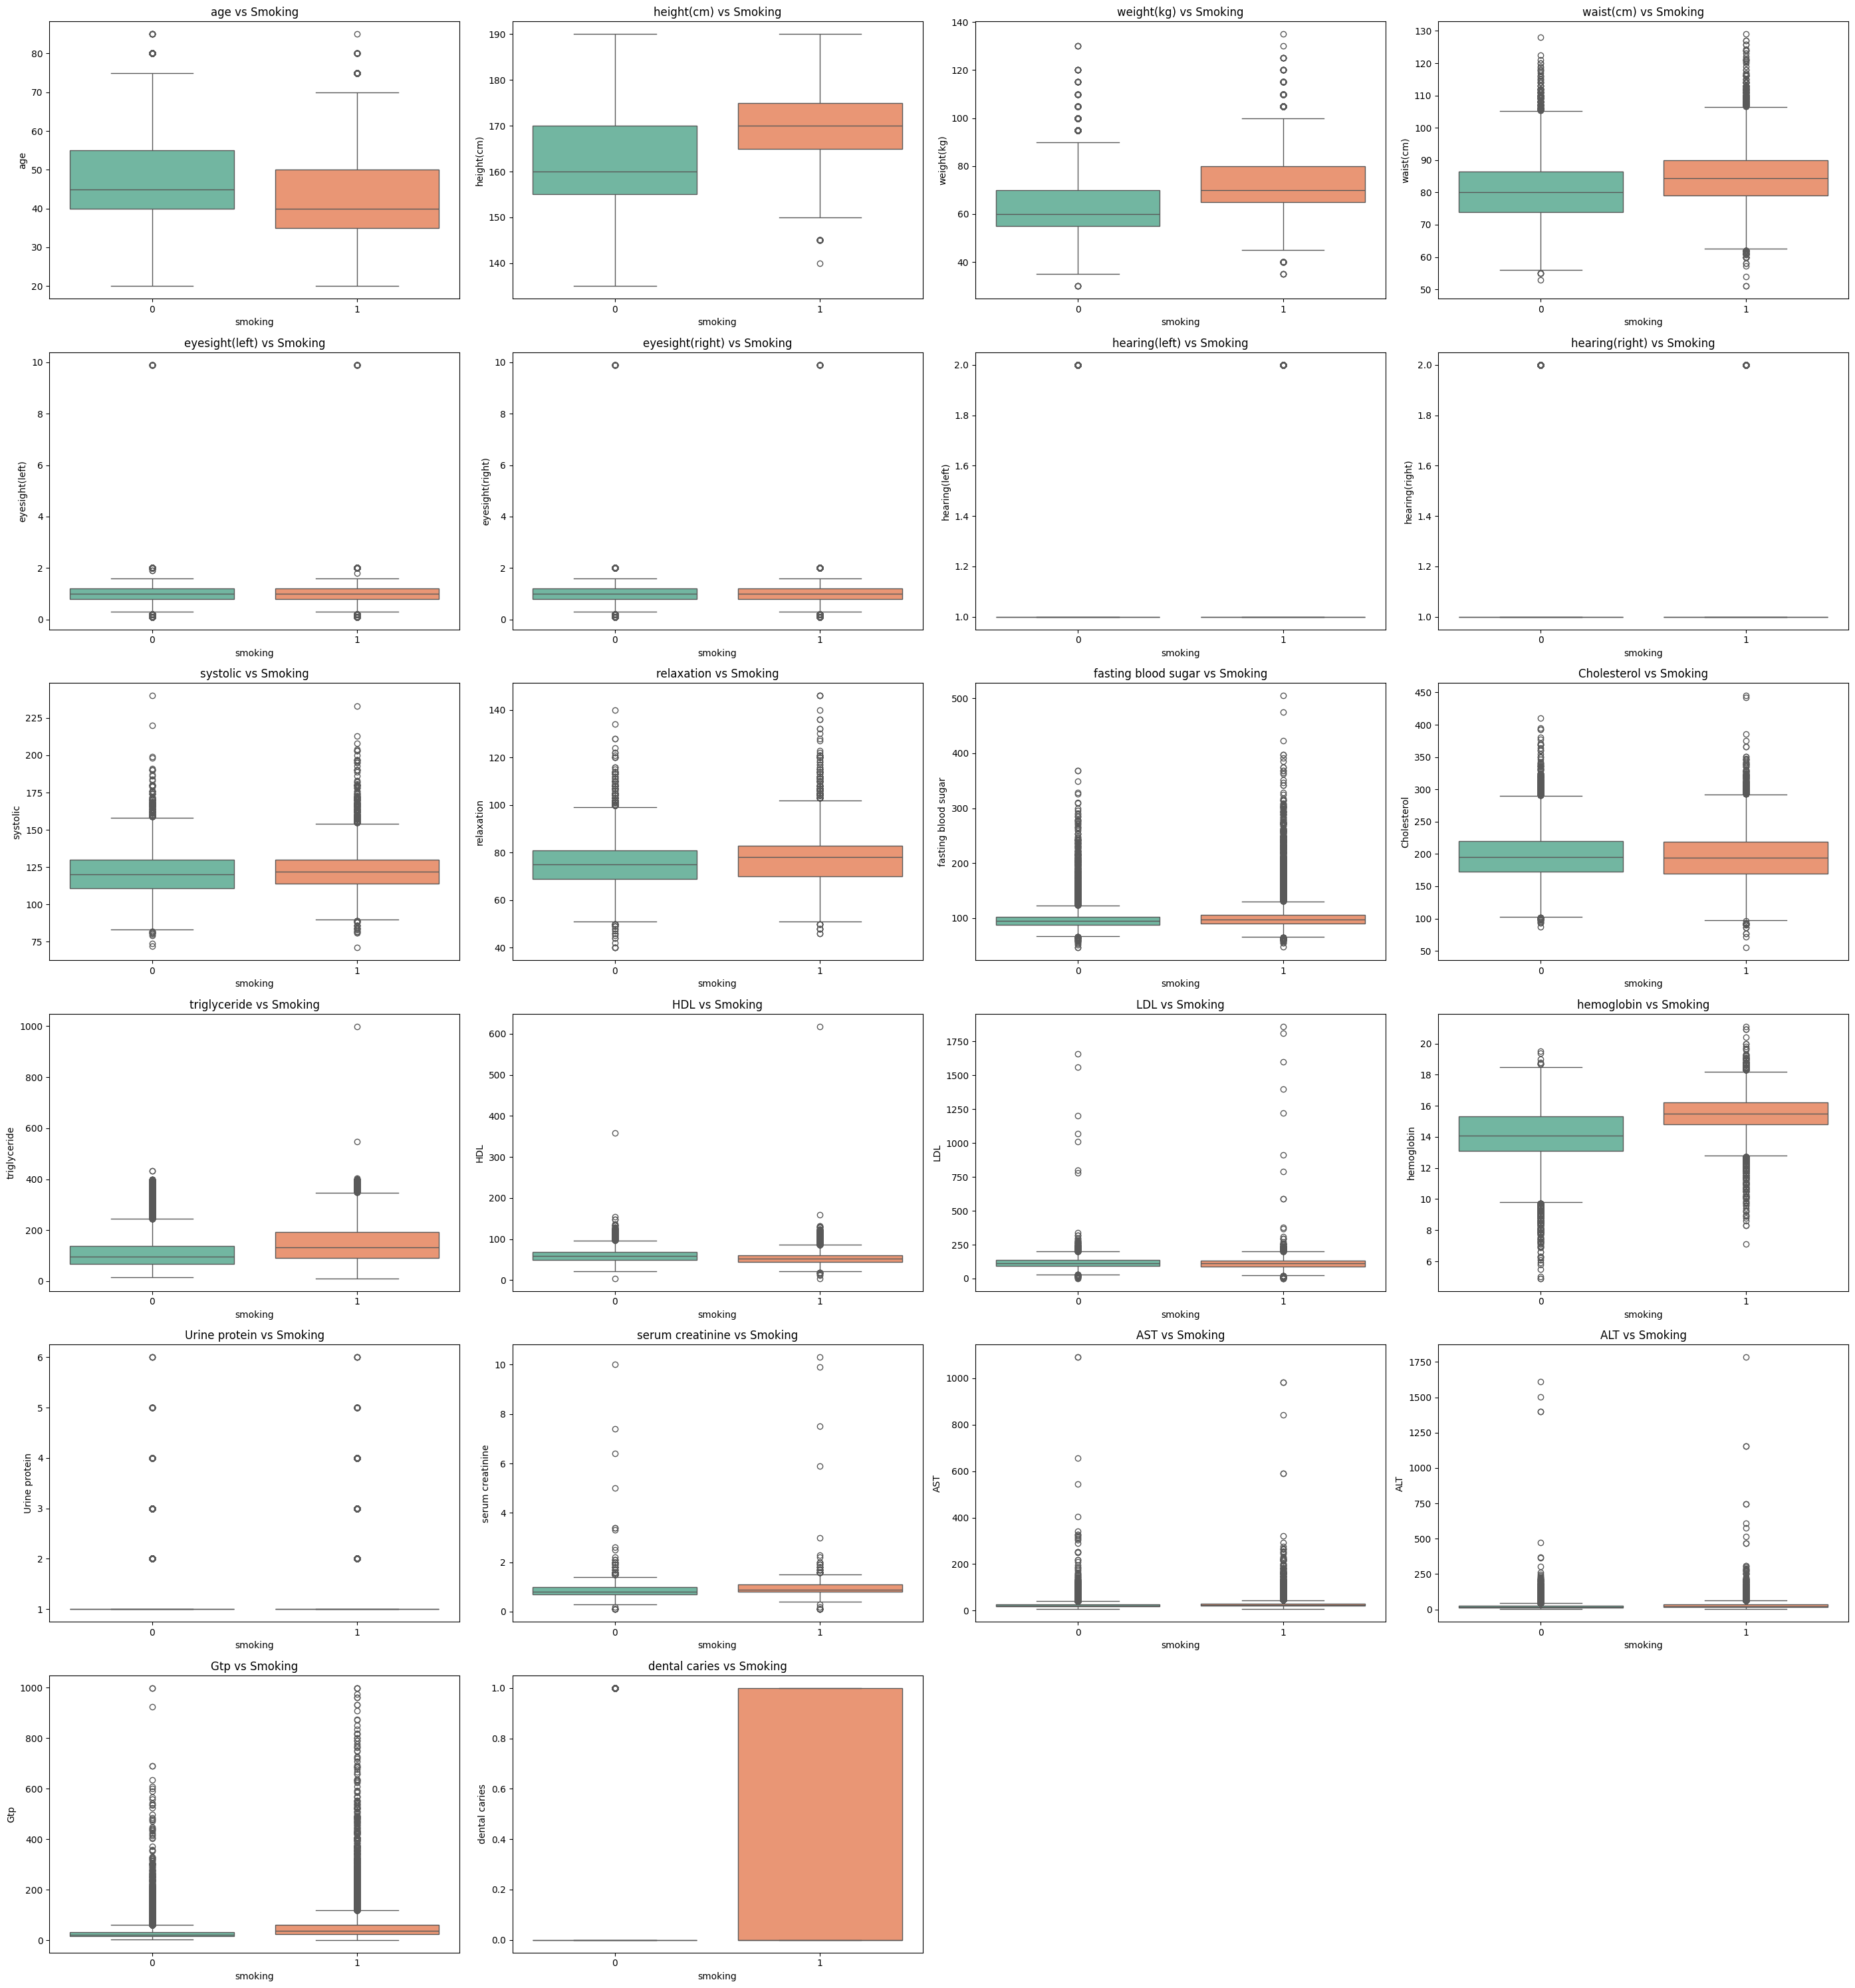

In [14]:
sns_plot(numerical_features, df, "box")

## Violin Plot

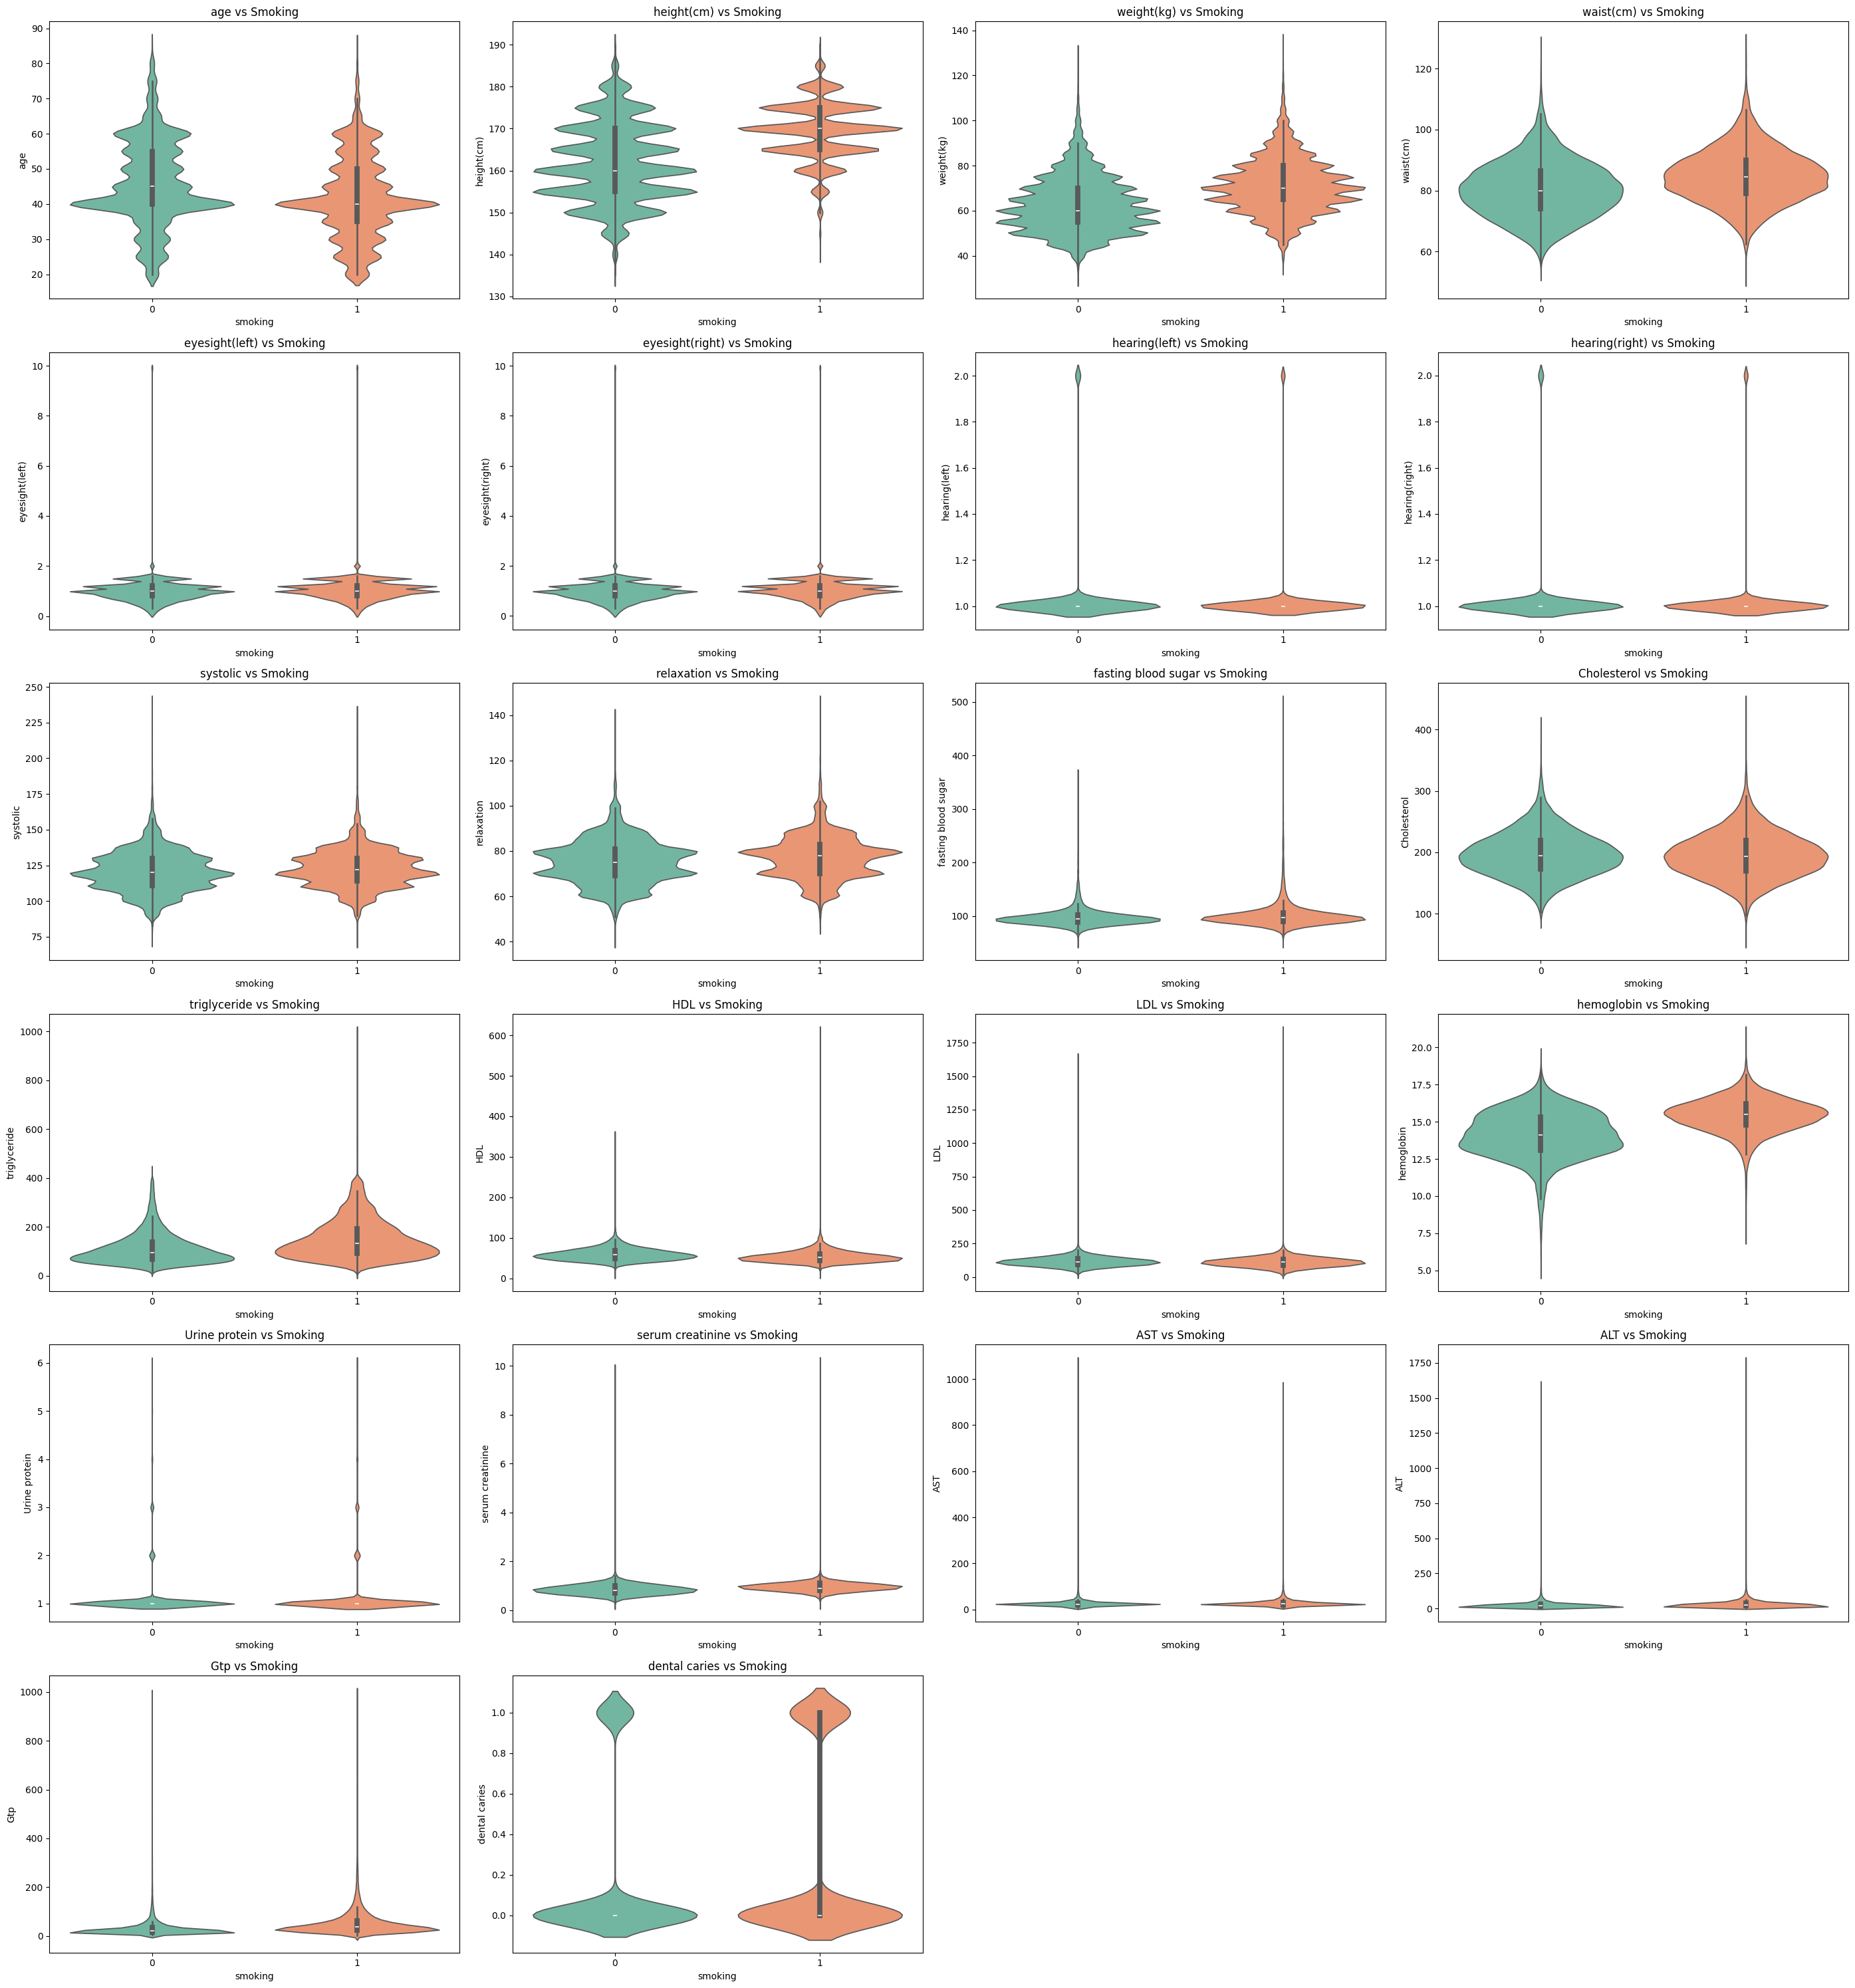

In [15]:
sns_plot(numerical_features, df, "violin")

## Histograms

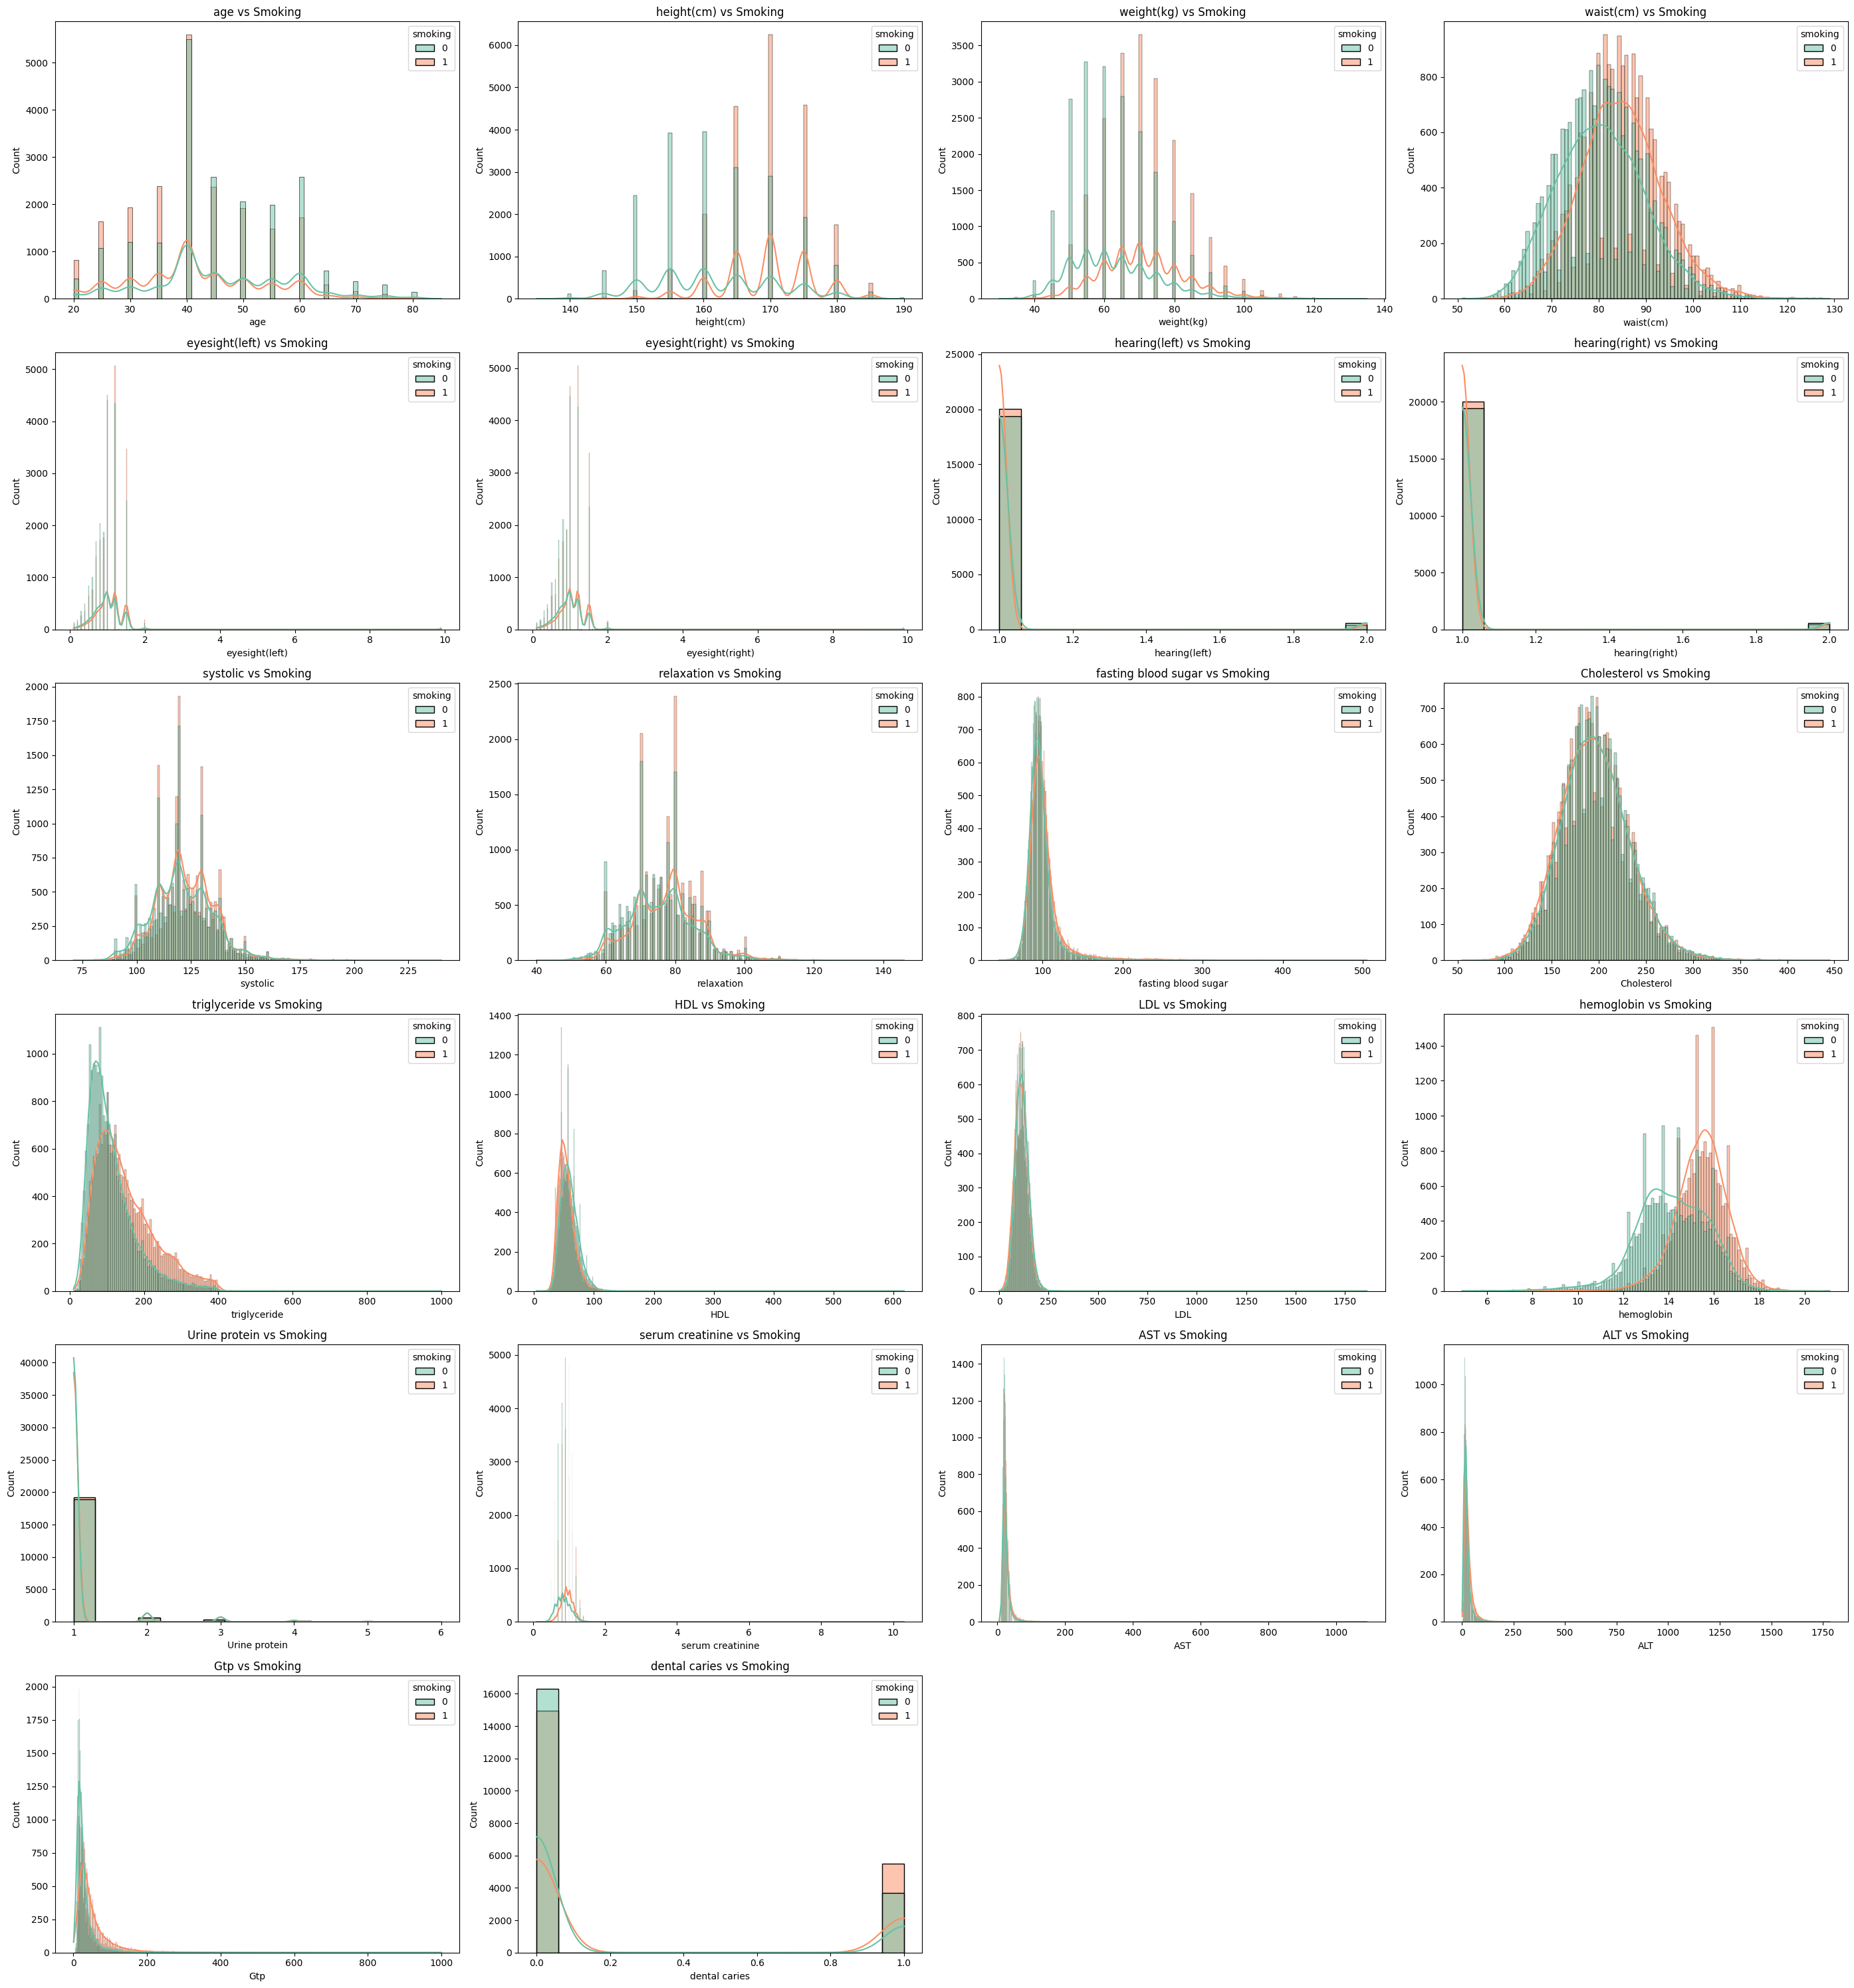

In [16]:
sns_plot(numerical_features, df, "histogram")

## Count Plots

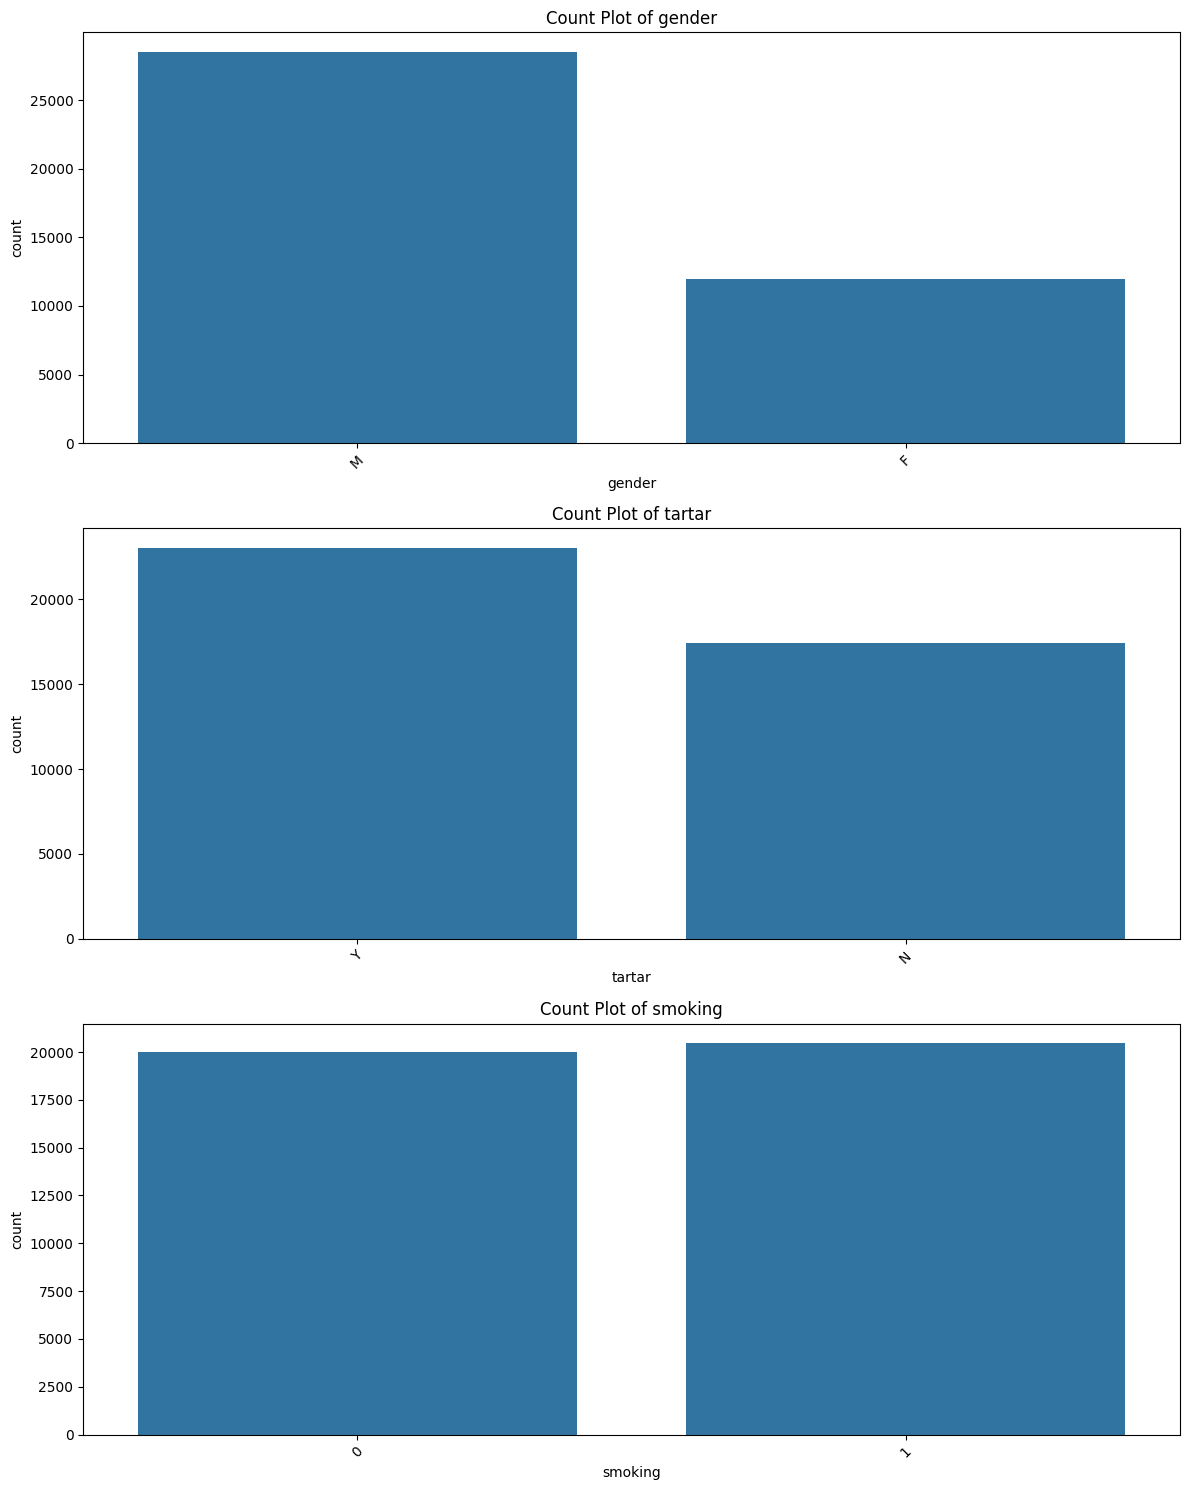

In [17]:
n_cat = len(categorical_features)

fig, axes = plt.subplots(n_cat, 1, figsize=(12, 5*n_cat))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i] if n_cat > 1 else axes)
    axes[i].set_title(f"Count Plot of {feature}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Data Encoding and Preprocessing

In [18]:
label_encoder = LabelEncoder()

for i in categorical_features:
    if i=="smoking":
        continue
    original_df[i] = label_encoder.fit_transform(original_df[i])
    
original_df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


In [19]:
label_encoder = LabelEncoder()

for i in categorical_features:
    if i=="smoking":
        continue
    df[i] = label_encoder.fit_transform(df[i])
    
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,60,165,70,83.0,0.9,0.7,1.0,1.0,122.0,...,134.0,15.4,1.0,1.1,41.0,77.0,479.0,0,1,0
1,1,30,170,70,83.0,0.4,0.5,1.0,1.0,102.0,...,107.0,13.9,1.0,0.7,40.0,35.0,11.0,0,0,0
2,1,60,165,60,80.0,1.2,0.9,1.0,1.0,171.0,...,83.0,15.0,1.0,1.2,17.0,16.0,23.0,0,1,0
3,1,20,170,75,81.2,1.0,1.0,1.0,1.0,121.0,...,126.0,16.2,1.0,0.9,47.0,28.0,22.0,1,0,1
4,1,55,165,60,82.0,1.2,0.9,1.0,1.0,120.0,...,160.0,15.2,1.0,1.2,20.0,20.0,24.0,0,0,1


Standardizing the Data

In [20]:
mm = StandardScaler()

cols = df.columns.difference(categorical_features)
df[cols] = mm.fit_transform(df[cols])

df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,1.361528,-0.077252,0.236253,0.039311,-0.250182,-0.667437,-0.160989,-0.162517,0.012939,...,0.484580,0.394806,-0.217299,0.934319,0.757704,1.691307,8.029208,-0.542123,1,0
1,1,-1.138538,0.482522,0.236253,0.039311,-1.289053,-1.089998,-0.160989,-0.162517,-1.464051,...,-0.181917,-0.588462,-0.217299,-0.926064,0.705498,0.246143,-0.594343,-0.542123,0,0
2,1,1.361528,-0.077252,-0.543484,-0.286026,0.373141,-0.244877,-0.160989,-0.162517,3.631564,...,-0.774359,0.132601,-0.217299,1.399414,-0.495260,-0.407622,-0.373227,-0.542123,1,0
3,1,-1.971893,0.482522,0.626122,-0.155892,-0.042407,-0.033597,-0.160989,-0.162517,-0.060911,...,0.287099,0.919215,-0.217299,0.004127,1.070946,0.005282,-0.391653,1.844599,0,1
4,1,0.944851,-0.077252,-0.543484,-0.069135,0.373141,-0.244877,-0.160989,-0.162517,-0.134760,...,1.126391,0.263703,-0.217299,1.399414,-0.338639,-0.269988,-0.354800,-0.542123,0,1


In [21]:
cols = original_df.columns.difference(categorical_features)
original_df[cols] = mm.fit_transform(original_df[cols])

original_df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,-0.346517,-1.049465,-0.457476,-0.080484,0.384861,-0.015315,-0.162046,-0.163846,-0.547989,...,0.269644,-1.101061,-0.215402,-0.838461,-0.422775,-0.259666,-0.257550,-0.520757,1,0
1,0,-0.346517,-0.505663,-0.457476,-0.112832,-0.436715,-0.838428,-0.162046,-0.163846,-0.182381,...,0.294079,-1.228898,-0.215402,-1.289883,-0.216113,-0.259666,-0.436511,-0.520757,1,0
2,1,0.896099,0.581943,-0.457476,-0.220659,-0.436715,-0.426872,-0.162046,-0.163846,1.206928,...,0.880501,0.752585,-0.215402,0.515806,-0.267779,-0.356604,-0.356973,-0.520757,0,1
3,1,-0.346517,0.038140,0.322543,0.641955,1.001044,1.013576,-0.162046,-0.163846,-1.571690,...,2.713072,0.049478,-0.215402,0.515806,-0.371110,-0.033477,-0.436511,-0.520757,1,0
4,0,-0.346517,-1.049465,-0.457476,0.426302,-0.025927,-0.015315,-0.162046,-0.163846,-0.109259,...,-0.194607,-1.356736,-0.215402,-1.289883,-0.526106,-0.421230,-0.356973,-0.520757,0,0


# Outlier Detection and Removal

We noticed the outliers from the box plots and have decided to remove the outliers from the following columns with a threshold z value of 3 (This is currently arbitrary and we shall experiment with it in the future)

In [22]:

columns_with_outliers = [
    'weight(kg)', 'waist(cm)', 'systolic', 'fasting blood sugar', 'Cholesterol',
    'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'AST', 'ALT', 'Gtp'
]

for column in columns_with_outliers:
    out_df = remove_outliers_zscore(df, column)

out_df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
1,1,-1.138538,0.482522,0.236253,0.039311,-1.289053,-1.089998,-0.160989,-0.162517,-1.464051,...,-0.181917,-0.588462,-0.217299,-0.926064,0.705498,0.246143,-0.594343,-0.542123,0,0
2,1,1.361528,-0.077252,-0.543484,-0.286026,0.373141,-0.244877,-0.160989,-0.162517,3.631564,...,-0.774359,0.132601,-0.217299,1.399414,-0.495260,-0.407622,-0.373227,-0.542123,1,0
3,1,-1.971893,0.482522,0.626122,-0.155892,-0.042407,-0.033597,-0.160989,-0.162517,-0.060911,...,0.287099,0.919215,-0.217299,0.004127,1.070946,0.005282,-0.391653,1.844599,0,1
4,1,0.944851,-0.077252,-0.543484,-0.069135,0.373141,-0.244877,-0.160989,-0.162517,-0.134760,...,1.126391,0.263703,-0.217299,1.399414,-0.338639,-0.269988,-0.354800,-0.542123,0,1
5,1,-0.721860,0.482522,-0.543484,-1.262038,0.373141,1.022804,-0.160989,-0.162517,2.376123,...,-0.181917,0.067050,-0.217299,0.469223,-0.704087,-0.373214,-0.502211,-0.542123,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1,3.028239,-0.637025,-0.153615,0.147756,-0.665730,-1.301278,6.211614,6.153184,1.268380,...,0.213044,-0.785115,-0.217299,1.399414,-0.182019,-0.132353,-0.465359,-0.542123,0,0
40451,1,-0.305183,0.482522,-0.543484,-0.524607,0.373141,-0.033597,-0.160989,-0.162517,-1.537900,...,0.064934,0.067050,-0.217299,0.469223,-0.390846,-0.304396,-0.594343,-0.542123,0,0
40452,1,0.111495,-0.077252,0.236253,0.039311,0.373141,-0.244877,-0.160989,-0.162517,-1.611750,...,-0.453453,0.525908,-0.217299,0.469223,-0.182019,0.108508,0.290124,-0.542123,1,1
40453,0,-0.305183,-0.077252,-0.543484,-0.286026,-0.457956,-0.033597,-0.160989,-0.162517,-0.356309,...,-0.873099,-1.440627,-0.217299,-0.460968,-0.599673,-0.648483,-0.631196,-0.542123,1,0


In [23]:
X_original = original_df.drop('smoking', axis=1)
y_original = original_df['smoking']
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

In [24]:
X = df.drop('smoking', axis=1)
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_out = out_df.drop('smoking', axis =1)
y_out = out_df['smoking']
X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

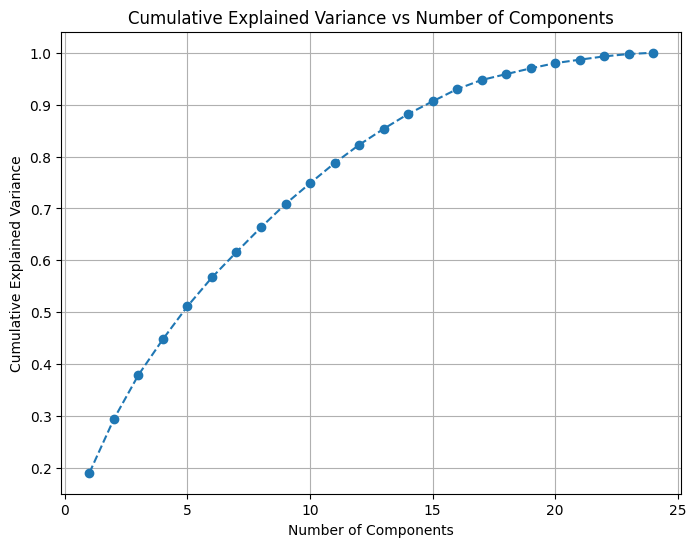

Explained Variance Ratio for each component: [0.19077398 0.10376204 0.0847046  0.06894184 0.0633977  0.05547136
 0.04889945 0.04759867 0.04502427 0.0398058  0.03883707 0.03514896
 0.03083267 0.0286496  0.02437711 0.02360549 0.01758794 0.01131951
 0.01108881 0.01007007 0.0066495  0.00639611 0.00449617 0.00256127]


In [26]:
pca = PCA()
pca.fit(X_out)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_variance)

# Model Training

## Gaussian Naive Bayes

### Vanilla

In [37]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier(X_original_train,X_original_test,y_original_train,y_original_test,GaussianNB())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Train Loss: 1.2966343644343454
Validation Loss: 1.3070898668468804
Test Loss: 1.3888588326915636

=== Train Set ===
Accuracy: 0.7048459138554082
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.64      0.73     28210
           1       0.57      0.81      0.67     16343

    accuracy                           0.70     44553
   macro avg       0.71      0.73      0.70     44553
weighted avg       0.75      0.70      0.71     44553


=== Validation Set ===
Accuracy: 0.7105404920093374
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74      3502
           1       0.58      0.81      0.68      2067

    accuracy                           0.71      5569
   macro avg       0.72      0.73      0.71      5569
weighted avg       0.75      0.71      0.72      5569


=== Test Set ===
Accuracy: 

In [36]:
print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier(X_train,X_test,y_train,y_test,GaussianNB())

-------------------- METRICS ON BALANCED DATASET --------------------
Train Loss: 1.3061646654820707
Validation Loss: 1.3308489794016536
Test Loss: 1.2987237810386185

=== Train Set ===
Accuracy: 0.7377950809541466
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.70     15924
           1       0.70      0.85      0.77     16440

    accuracy                           0.74     32364
   macro avg       0.75      0.74      0.73     32364
weighted avg       0.75      0.74      0.73     32364


=== Validation Set ===
Accuracy: 0.7218788627935723
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.61      0.69      2072
           1       0.67      0.84      0.75      1973

    accuracy                           0.72      4045
   macro avg       0.74      0.72      0.72      4045
weighted avg       0.74      0.72      0.72      4045


=== Test Set ===
Accuracy: 0.

### K-Fold

In [35]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier_kfold(X_original,y_original,GaussianNB())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier_kfold(X,y,GaussianNB())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Fold 1: Train Loss=1.3121, Val Loss=1.3318, Val Accuracy=0.7081
Fold 2: Train Loss=1.2895, Val Loss=1.2824, Val Accuracy=0.7057
Fold 3: Train Loss=1.2602, Val Loss=1.2692, Val Accuracy=0.6994

=== Summary ===
Mean Train Loss: 1.2873
Mean Validation Loss: 1.2944
Mean Validation Accuracy: 0.7044
-------------------- METRICS ON BALANCED DATASET --------------------
Fold 1: Train Loss=1.2972, Val Loss=1.3227, Val Accuracy=0.7307
Fold 2: Train Loss=1.3350, Val Loss=1.4019, Val Accuracy=0.7376
Fold 3: Train Loss=1.3022, Val Loss=1.2678, Val Accuracy=0.7372

=== Summary ===
Mean Train Loss: 1.3115
Mean Validation Loss: 1.3308
Mean Validation Accuracy: 0.7351


### Outlier Removed

In [34]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,GaussianNB())

-------------------- METRICS ON  DATASET --------------------
Train Loss: 1.3386467833272022
Validation Loss: 1.4108944696079293
Test Loss: 1.2763703945608373

=== Train Set ===
Accuracy: 0.7365378573672636
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71     15979
           1       0.69      0.85      0.76     15851

    accuracy                           0.74     31830
   macro avg       0.75      0.74      0.73     31830
weighted avg       0.75      0.74      0.73     31830


=== Validation Set ===
Accuracy: 0.7341040462427746
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69      1928
           1       0.70      0.85      0.77      2051

    accuracy                           0.73      3979
   macro avg       0.75      0.73      0.73      3979
weighted avg       0.74      0.73      0.73      3979


=== Test Set ===
Accuracy: 0.74692133

### PCA

In [33]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier_pca(X_out_train,X_out_test,y_out_train,y_out_test,GaussianNB())

-------------------- METRICS ON  DATASET --------------------
Train Loss: 0.6301685394245993
Validation Loss: 0.6469136094801416
Test Loss: 0.6375682451634461

=== Train Set ===
Accuracy: 0.7179390512095507
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70     15979
           1       0.69      0.78      0.73     15851

    accuracy                           0.72     31830
   macro avg       0.72      0.72      0.72     31830
weighted avg       0.72      0.72      0.72     31830


=== Validation Set ===
Accuracy: 0.7172656446343302
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69      1928
           1       0.70      0.79      0.74      2051

    accuracy                           0.72      3979
   macro avg       0.72      0.71      0.71      3979
weighted avg       0.72      0.72      0.72      3979


=== Test Set ===
Accuracy: 0.73033425

## Decision Trees

### Vanilla

In [32]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier(X_original_train,X_original_test,y_original_train,y_original_test,DecisionTreeClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier(X_train,X_test,y_train,y_test,DecisionTreeClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Train Loss: 2.220446049250313e-16
Validation Loss: 7.766633878064388
Test Loss: 8.127617353093562

=== Train Set ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28210
           1       1.00      1.00      1.00     16343

    accuracy                           1.00     44553
   macro avg       1.00      1.00      1.00     44553
weighted avg       1.00      1.00      1.00     44553


=== Validation Set ===
Accuracy: 0.784521458071467
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      3502
           1       0.71      0.71      0.71      2067

    accuracy                           0.78      5569
   macro avg       0.77      0.77      0.77      5569
weighted avg       0.78      0.78      0.78      5569


=== Test Set ===
Accuracy: 0.7745062836624

### K-Fold

In [38]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier_kfold(X_original,y_original,DecisionTreeClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier_kfold(X,y,DecisionTreeClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Fold 1: Train Loss=0.0000, Val Loss=8.2168, Val Accuracy=0.7720
Fold 2: Train Loss=0.0000, Val Loss=8.2556, Val Accuracy=0.7710
Fold 3: Train Loss=0.0000, Val Loss=8.5527, Val Accuracy=0.7627

=== Summary ===
Mean Train Loss: 0.0000
Mean Validation Loss: 8.3417
Mean Validation Accuracy: 0.7686
-------------------- METRICS ON BALANCED DATASET --------------------
Fold 1: Train Loss=0.0000, Val Loss=9.3123, Val Accuracy=0.7416
Fold 2: Train Loss=0.0000, Val Loss=9.0637, Val Accuracy=0.7485
Fold 3: Train Loss=0.0000, Val Loss=9.0824, Val Accuracy=0.7480

=== Summary ===
Mean Train Loss: 0.0000
Mean Validation Loss: 9.1528
Mean Validation Accuracy: 0.7461


### Outlier Removed

In [39]:
print("-"*20,"METRICS ON DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,DecisionTreeClassifier())

-------------------- METRICS ON DATASET --------------------
Train Loss: 2.220446049250313e-16
Validation Loss: 8.741423855365179
Test Loss: 8.442494334922642

=== Train Set ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       1.00      1.00      1.00     15851

    accuracy                           1.00     31830
   macro avg       1.00      1.00      1.00     31830
weighted avg       1.00      1.00      1.00     31830


=== Validation Set ===
Accuracy: 0.7574767529530033
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1928
           1       0.76      0.77      0.77      2051

    accuracy                           0.76      3979
   macro avg       0.76      0.76      0.76      3979
weighted avg       0.76      0.76      0.76      3979


=== Test Set ===
Accuracy: 0.7657702940437295
Classi

### PCA

In [40]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier_pca(X_out_train,X_out_test,y_out_train,y_out_test,DecisionTreeClassifier())

-------------------- METRICS ON  DATASET --------------------
Train Loss: 2.220446049250313e-16
Validation Loss: 9.366458307199583
Test Loss: 9.04035337580772

=== Train Set ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       1.00      1.00      1.00     15851

    accuracy                           1.00     31830
   macro avg       1.00      1.00      1.00     31830
weighted avg       1.00      1.00      1.00     31830


=== Validation Set ===
Accuracy: 0.7401357124905755
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1928
           1       0.74      0.76      0.75      2051

    accuracy                           0.74      3979
   macro avg       0.74      0.74      0.74      3979
weighted avg       0.74      0.74      0.74      3979


=== Test Set ===
Accuracy: 0.749183211862277
Classif

## Random Forest

### Vanilla

In [41]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier(X_original_train,X_original_test,y_original_train,y_original_test,RandomForestClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier(X_train,X_test,y_train,y_test,RandomForestClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Train Loss: 0.10305570418217311
Validation Loss: 0.3715183752176227
Test Loss: 0.3983659887175682

=== Train Set ===
Accuracy: 0.9999775548223464
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28210
           1       1.00      1.00      1.00     16343

    accuracy                           1.00     44553
   macro avg       1.00      1.00      1.00     44553
weighted avg       1.00      1.00      1.00     44553


=== Validation Set ===
Accuracy: 0.8328245645537798
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      3502
           1       0.76      0.80      0.78      2067

    accuracy                           0.83      5569
   macro avg       0.82      0.83      0.82      5569
weighted avg       0.83      0.83      0.83      5569


=== Test Set ===
Accuracy:

### K-Fold

In [42]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier_kfold(X_original,y_original,RandomForestClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier_kfold(X,y,RandomForestClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Fold 1: Train Loss=0.1080, Val Loss=0.4022, Val Accuracy=0.8175
Fold 2: Train Loss=0.1077, Val Loss=0.3829, Val Accuracy=0.8225
Fold 3: Train Loss=0.1073, Val Loss=0.3945, Val Accuracy=0.8176

=== Summary ===
Mean Train Loss: 0.1077
Mean Validation Loss: 0.3932
Mean Validation Accuracy: 0.8192
-------------------- METRICS ON BALANCED DATASET --------------------
Fold 1: Train Loss=0.1144, Val Loss=0.4195, Val Accuracy=0.8077
Fold 2: Train Loss=0.1149, Val Loss=0.4163, Val Accuracy=0.8101
Fold 3: Train Loss=0.1155, Val Loss=0.4093, Val Accuracy=0.8137

=== Summary ===
Mean Train Loss: 0.1149
Mean Validation Loss: 0.4150
Mean Validation Accuracy: 0.8105


### Outlier Removed

In [43]:
print("-"*20,"METRICS ON DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,RandomForestClassifier())

-------------------- METRICS ON DATASET --------------------
Train Loss: 0.1114916665622053
Validation Loss: 0.4070863351896397
Test Loss: 0.38629850715765346

=== Train Set ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       1.00      1.00      1.00     15851

    accuracy                           1.00     31830
   macro avg       1.00      1.00      1.00     31830
weighted avg       1.00      1.00      1.00     31830


=== Validation Set ===
Accuracy: 0.8115104297562201
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78      1928
           1       0.77      0.91      0.83      2051

    accuracy                           0.81      3979
   macro avg       0.82      0.81      0.81      3979
weighted avg       0.82      0.81      0.81      3979


=== Test Set ===
Accuracy: 0.8258356370947474
Classi

### PCA

In [44]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier_pca(X_out_train,X_out_test,y_out_train,y_out_test,RandomForestClassifier())

-------------------- METRICS ON  DATASET --------------------
Train Loss: 0.1222297388207997
Validation Loss: 0.4334051067110328
Test Loss: 0.4165516155055321

=== Train Set ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       1.00      1.00      1.00     15851

    accuracy                           1.00     31830
   macro avg       1.00      1.00      1.00     31830
weighted avg       1.00      1.00      1.00     31830


=== Validation Set ===
Accuracy: 0.8027142498115104
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.78      1928
           1       0.77      0.89      0.82      2051

    accuracy                           0.80      3979
   macro avg       0.81      0.80      0.80      3979
weighted avg       0.81      0.80      0.80      3979


=== Test Set ===
Accuracy: 0.8112591103292285
Classi

## Logistic Regression

### Vanilla

In [45]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier(X_original_train,X_original_test,y_original_train,y_original_test,LogisticRegression())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier(X_train,X_test,y_train,y_test,LogisticRegression())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Train Loss: 0.47064424187543524
Validation Loss: 0.47233324954761796
Test Loss: 0.4861710288247277

=== Train Set ===
Accuracy: 0.7473795255089444
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80     28210
           1       0.64      0.69      0.67     16343

    accuracy                           0.75     44553
   macro avg       0.73      0.74      0.73     44553
weighted avg       0.75      0.75      0.75     44553


=== Validation Set ===
Accuracy: 0.7437601005566529
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      3502
           1       0.65      0.69      0.67      2067

    accuracy                           0.74      5569
   macro avg       0.73      0.73      0.73      5569
weighted avg       0.75      0.74      0.75      5569


=== Test Set ===
Accuracy

### K-Fold

In [46]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier_kfold(X_original,y_original,LogisticRegression())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier_kfold(X,y,LogisticRegression())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Fold 1: Train Loss=0.4711, Val Loss=0.4752, Val Accuracy=0.7456
Fold 2: Train Loss=0.4740, Val Loss=0.4693, Val Accuracy=0.7498
Fold 3: Train Loss=0.4715, Val Loss=0.4744, Val Accuracy=0.7403

=== Summary ===
Mean Train Loss: 0.4722
Mean Validation Loss: 0.4730
Mean Validation Accuracy: 0.7452
-------------------- METRICS ON BALANCED DATASET --------------------
Fold 1: Train Loss=0.4831, Val Loss=0.4891, Val Accuracy=0.7588
Fold 2: Train Loss=0.4837, Val Loss=0.4878, Val Accuracy=0.7651
Fold 3: Train Loss=0.4874, Val Loss=0.4804, Val Accuracy=0.7665

=== Summary ===
Mean Train Loss: 0.4848
Mean Validation Loss: 0.4857
Mean Validation Accuracy: 0.7635


### Outlier Removed

In [47]:
print("-"*20,"METRICS ON DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,LogisticRegression())

-------------------- METRICS ON DATASET --------------------
Train Loss: 0.4821167750721932
Validation Loss: 0.49234096024798873
Test Loss: 0.4747821452280386

=== Train Set ===
Accuracy: 0.7634621426327364
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.73     15979
           1       0.70      0.91      0.79     15851

    accuracy                           0.76     31830
   macro avg       0.79      0.76      0.76     31830
weighted avg       0.79      0.76      0.76     31830


=== Validation Set ===
Accuracy: 0.7627544609198291
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.61      0.71      1928
           1       0.71      0.90      0.80      2051

    accuracy                           0.76      3979
   macro avg       0.78      0.76      0.76      3979
weighted avg       0.78      0.76      0.76      3979


=== Test Set ===
Accuracy: 0.77255591

### PCA

In [48]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier_pca(X_out_train,X_out_test,y_out_train,y_out_test,LogisticRegression())

-------------------- METRICS ON  DATASET --------------------
Train Loss: 0.5276025360735341
Validation Loss: 0.5374461513017523
Test Loss: 0.5113075153731252

=== Train Set ===
Accuracy: 0.7363179390512096
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72     15979
           1       0.71      0.80      0.75     15851

    accuracy                           0.74     31830
   macro avg       0.74      0.74      0.74     31830
weighted avg       0.74      0.74      0.74     31830


=== Validation Set ===
Accuracy: 0.7315908519728574
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.71      1928
           1       0.72      0.79      0.75      2051

    accuracy                           0.73      3979
   macro avg       0.73      0.73      0.73      3979
weighted avg       0.73      0.73      0.73      3979


=== Test Set ===
Accuracy: 0.75395828

## Support Vector Classifier

### Vanilla

In [50]:
from sklearn.calibration import CalibratedClassifierCV

linear_svc = LinearSVC()
calibrated = CalibratedClassifierCV(linear_svc)

print("-"*20, "METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier(X_original_train, X_original_test, y_original_train, y_original_test, calibrated)

print("-"*20, "METRICS ON BALANCED DATASET", "-"*20)
model_classifier(X_train, X_test, y_train, y_test, calibrated)

-------------------- METRICS ON IMBALANCED DATASET --------------------
Train Loss: 0.47201947922686366
Validation Loss: 0.47376780846096694
Test Loss: 0.4885096312941596

=== Train Set ===
Accuracy: 0.7458532534285008
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     28210
           1       0.65      0.66      0.66     16343

    accuracy                           0.75     44553
   macro avg       0.73      0.73      0.73     44553
weighted avg       0.75      0.75      0.75     44553


=== Validation Set ===
Accuracy: 0.7451966241695098
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      3502
           1       0.66      0.66      0.66      2067

    accuracy                           0.75      5569
   macro avg       0.73      0.73      0.73      5569
weighted avg       0.75      0.75      0.75      5569


=== Test Set ===
Accuracy

### K-Fold

In [51]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier_kfold(X_original,y_original,calibrated)

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier_kfold(X,y,calibrated)

-------------------- METRICS ON IMBALANCED DATASET --------------------
Fold 1: Train Loss=0.4723, Val Loss=0.4770, Val Accuracy=0.7449
Fold 2: Train Loss=0.4754, Val Loss=0.4701, Val Accuracy=0.7477
Fold 3: Train Loss=0.4727, Val Loss=0.4757, Val Accuracy=0.7387

=== Summary ===
Mean Train Loss: 0.4735
Mean Validation Loss: 0.4742
Mean Validation Accuracy: 0.7438
-------------------- METRICS ON BALANCED DATASET --------------------
Fold 1: Train Loss=0.4834, Val Loss=0.4894, Val Accuracy=0.7582
Fold 2: Train Loss=0.4840, Val Loss=0.4877, Val Accuracy=0.7657
Fold 3: Train Loss=0.4877, Val Loss=0.4807, Val Accuracy=0.7657

=== Summary ===
Mean Train Loss: 0.4850
Mean Validation Loss: 0.4859
Mean Validation Accuracy: 0.7632


### Outlier Removed

In [52]:
print("-"*20,"METRICS ON DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,calibrated)

-------------------- METRICS ON DATASET --------------------
Train Loss: 0.48221243220739385
Validation Loss: 0.49249758389208537
Test Loss: 0.47499002439562993

=== Train Set ===
Accuracy: 0.7634935595350298
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72     15979
           1       0.70      0.91      0.79     15851

    accuracy                           0.76     31830
   macro avg       0.79      0.76      0.76     31830
weighted avg       0.79      0.76      0.76     31830


=== Validation Set ===
Accuracy: 0.7635084192008043
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.61      0.71      1928
           1       0.71      0.91      0.80      2051

    accuracy                           0.76      3979
   macro avg       0.79      0.76      0.76      3979
weighted avg       0.78      0.76      0.76      3979


=== Test Set ===
Accuracy: 0.772304

### PCA

In [53]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier_pca(X_out_train,X_out_test,y_out_train,y_out_test,calibrated)

-------------------- METRICS ON  DATASET --------------------
Train Loss: 0.5276881482675345
Validation Loss: 0.5374395063921635
Test Loss: 0.5110396067546649

=== Train Set ===
Accuracy: 0.7359723531259817
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72     15979
           1       0.71      0.80      0.75     15851

    accuracy                           0.74     31830
   macro avg       0.74      0.74      0.73     31830
weighted avg       0.74      0.74      0.73     31830


=== Validation Set ===
Accuracy: 0.7320934908268409
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.71      1928
           1       0.72      0.80      0.75      2051

    accuracy                           0.73      3979
   macro avg       0.73      0.73      0.73      3979
weighted avg       0.73      0.73      0.73      3979


=== Test Set ===
Accuracy: 0.75521487

In [54]:
from sklearn.ensemble import AdaBoostClassifier

print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier(X_original_train,X_original_test,y_original_train,y_original_test,AdaBoostClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier(X_train,X_test,y_train,y_test,AdaBoostClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Train Loss: 0.6785191716146374
Validation Loss: 0.6787831719541163
Test Loss: 0.6791532448926247

=== Train Set ===
Accuracy: 0.7630687046887976
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     28210
           1       0.66      0.72      0.69     16343

    accuracy                           0.76     44553
   macro avg       0.75      0.75      0.75     44553
weighted avg       0.77      0.76      0.76     44553


=== Validation Set ===
Accuracy: 0.7575866403304005
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      3502
           1       0.66      0.70      0.68      2067

    accuracy                           0.76      5569
   macro avg       0.74      0.75      0.74      5569
weighted avg       0.76      0.76      0.76      5569


=== Test Set ===
Accuracy: 

In [55]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier_kfold(X_original,y_original,AdaBoostClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier_kfold(X,y,AdaBoostClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Fold 1: Train Loss=0.6792, Val Loss=0.6792, Val Accuracy=0.7548
Fold 2: Train Loss=0.6785, Val Loss=0.6782, Val Accuracy=0.7656
Fold 3: Train Loss=0.6792, Val Loss=0.6796, Val Accuracy=0.7585

=== Summary ===
Mean Train Loss: 0.6790
Mean Validation Loss: 0.6790
Mean Validation Accuracy: 0.7596
-------------------- METRICS ON BALANCED DATASET --------------------
Fold 1: Train Loss=0.6806, Val Loss=0.6814, Val Accuracy=0.7709
Fold 2: Train Loss=0.6812, Val Loss=0.6813, Val Accuracy=0.7715
Fold 3: Train Loss=0.6807, Val Loss=0.6807, Val Accuracy=0.7748

=== Summary ===
Mean Train Loss: 0.6808
Mean Validation Loss: 0.6811
Mean Validation Accuracy: 0.7724


In [57]:
print("-"*20,"METRICS ON DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,AdaBoostClassifier())

-------------------- METRICS ON DATASET --------------------
Train Loss: 0.6814114674212863
Validation Loss: 0.6820746821790629
Test Loss: 0.6814004634459496

=== Train Set ===
Accuracy: 0.7740810556079171
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75     15979
           1       0.73      0.87      0.79     15851

    accuracy                           0.77     31830
   macro avg       0.78      0.77      0.77     31830
weighted avg       0.78      0.77      0.77     31830


=== Validation Set ===
Accuracy: 0.762000502638854
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.65      0.73      1928
           1       0.73      0.86      0.79      2051

    accuracy                           0.76      3979
   macro avg       0.77      0.76      0.76      3979
weighted avg       0.77      0.76      0.76      3979


=== Test Set ===
Accuracy: 0.7765770294

In [58]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier_pca(X_out_train,X_out_test,y_out_train,y_out_test,AdaBoostClassifier())

-------------------- METRICS ON  DATASET --------------------
Train Loss: 0.6847820775438683
Validation Loss: 0.6852867889004629
Test Loss: 0.6846435563571301

=== Train Set ===
Accuracy: 0.7353440150801132
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72     15979
           1       0.71      0.80      0.75     15851

    accuracy                           0.74     31830
   macro avg       0.74      0.74      0.73     31830
weighted avg       0.74      0.74      0.73     31830


=== Validation Set ===
Accuracy: 0.7318421713998492
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1928
           1       0.72      0.79      0.75      2051

    accuracy                           0.73      3979
   macro avg       0.73      0.73      0.73      3979
weighted avg       0.73      0.73      0.73      3979


=== Test Set ===
Accuracy: 0.74692133

In [59]:
from sklearn.neural_network import MLPClassifier

print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier(X_original_train,X_original_test,y_original_train,y_original_test,MLPClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier(X_train,X_test,y_train,y_test,MLPClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Train Loss: 0.4031847144876147
Validation Loss: 0.4654153988897271
Test Loss: 0.475373274354307

=== Train Set ===
Accuracy: 0.8034924696428972
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     28210
           1       0.73      0.73      0.73     16343

    accuracy                           0.80     44553
   macro avg       0.79      0.79      0.79     44553
weighted avg       0.80      0.80      0.80     44553


=== Validation Set ===
Accuracy: 0.7566888130723649
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      3502
           1       0.68      0.66      0.67      2067

    accuracy                           0.76      5569
   macro avg       0.74      0.74      0.74      5569
weighted avg       0.76      0.76      0.76      5569


=== Test Set ===
Accuracy: 0

In [60]:
print("-"*20,"METRICS ON IMBALANCED DATASET", "-"*20)
model_classifier_kfold(X_original,y_original,MLPClassifier())

print("-"*20,"METRICS ON BALANCED DATASET", "-"*20)
model_classifier_kfold(X,y,MLPClassifier())

-------------------- METRICS ON IMBALANCED DATASET --------------------
Fold 1: Train Loss=0.4004, Val Loss=0.4701, Val Accuracy=0.7581
Fold 2: Train Loss=0.4031, Val Loss=0.4720, Val Accuracy=0.7634
Fold 3: Train Loss=0.3995, Val Loss=0.4804, Val Accuracy=0.7520

=== Summary ===
Mean Train Loss: 0.4010
Mean Validation Loss: 0.4742
Mean Validation Accuracy: 0.7578
-------------------- METRICS ON BALANCED DATASET --------------------
Fold 1: Train Loss=0.4047, Val Loss=0.4964, Val Accuracy=0.7656
Fold 2: Train Loss=0.3983, Val Loss=0.4943, Val Accuracy=0.7683
Fold 3: Train Loss=0.4082, Val Loss=0.4798, Val Accuracy=0.7695

=== Summary ===
Mean Train Loss: 0.4037
Mean Validation Loss: 0.4902
Mean Validation Accuracy: 0.7678


In [61]:
print("-"*20,"METRICS ON DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,MLPClassifier())

-------------------- METRICS ON DATASET --------------------
Train Loss: 0.4049501861113946
Validation Loss: 0.49227899693688
Test Loss: 0.48131698180548

=== Train Set ===
Accuracy: 0.8133521834747094
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80     15979
           1       0.78      0.87      0.82     15851

    accuracy                           0.81     31830
   macro avg       0.82      0.81      0.81     31830
weighted avg       0.82      0.81      0.81     31830


=== Validation Set ===
Accuracy: 0.7627544609198291
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1928
           1       0.74      0.83      0.78      2051

    accuracy                           0.76      3979
   macro avg       0.77      0.76      0.76      3979
weighted avg       0.77      0.76      0.76      3979


=== Test Set ===
Accuracy: 0.7723045991455

In [62]:
print("-"*20,"METRICS ON  DATASET", "-"*20)
model_classifier_pca(X_out_train,X_out_test,y_out_train,y_out_test,MLPClassifier())

-------------------- METRICS ON  DATASET --------------------
Train Loss: 0.44817170090858066
Validation Loss: 0.5107781741764932
Test Loss: 0.5013355849543213

=== Train Set ===
Accuracy: 0.7888784165881244
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77     15979
           1       0.75      0.86      0.80     15851

    accuracy                           0.79     31830
   macro avg       0.79      0.79      0.79     31830
weighted avg       0.79      0.79      0.79     31830


=== Validation Set ===
Accuracy: 0.7396330736365921
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71      1928
           1       0.72      0.81      0.76      2051

    accuracy                           0.74      3979
   macro avg       0.74      0.74      0.74      3979
weighted avg       0.74      0.74      0.74      3979


=== Test Set ===
Accuracy: 0.7532043

In [68]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    'criterion': ['gini', 'entropy'],     
    'max_depth': [None, 5, 10],              
    'min_samples_split': [2, 5],          
    'min_samples_leaf': [1, 2]            
}

dt_grid_outlier = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=4)
print("-"*20,"METRICS ON DATASET", "-"*20)
model_classifier(X_out_train,X_out_test,y_out_train,y_out_test,dt_grid_outlier)

-------------------- METRICS ON DATASET --------------------
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Train Loss: 0.48513996002270865
Validation Loss: 0.5160585220614099
Test Loss: 0.48620243518989553

=== Train Set ===
Accuracy: 0.7654728243795161
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72     15979
           1       0.70      0.92      0.80     15851

    accuracy                           0.77     31830
   macro avg       0.79      0.77      0.76     31830
weighted avg       0.79      0.77      0.76     31830


=== Validation Set ===
Accuracy: 0.7589846695149535
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.59      0.70      1928
           1       0.71      0.91      0.80      2051

    accuracy                           0.76      3979
   macro avg       0.79      0.75      0.75      3979
weighted avg       0.78      0.

In [71]:
lr_model = LogisticRegression(random_state=42)

lr_param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1],           
    'solver': ['liblinear', 'saga'] 
}

lr_grid_outlier = GridSearchCV(lr_model, lr_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=4)
print("-" * 20, "METRICS ON DATASET (Logistic Regression)", "-" * 20)
model_classifier(X_out_train, X_out_test, y_out_train, y_out_test, lr_grid_outlier)

-------------------- METRICS ON DATASET (Logistic Regression) --------------------
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Train Loss: 0.482248687705077
Validation Loss: 0.49227679534211694
Test Loss: 0.4744727355702062

=== Train Set ===
Accuracy: 0.7641218975808985
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.73     15979
           1       0.70      0.91      0.79     15851

    accuracy                           0.76     31830
   macro avg       0.79      0.76      0.76     31830
weighted avg       0.79      0.76      0.76     31830


=== Validation Set ===
Accuracy: 0.7599899472229203
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71      1928
           1       0.71      0.90      0.79      2051

    accuracy                           0.76      3979
   macro avg       0.78      0.76      0.75      3979
weighted avg

In [74]:
linear_svc_model = LinearSVC(random_state=42)

linear_svc_param_grid = {
    'C': [0.01, 0.1, 1],  
    'loss': ['hinge', 'squared_hinge']  
}

linear_svc_grid_outlier = GridSearchCV(linear_svc_model, linear_svc_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=4)
calibrated_model = CalibratedClassifierCV(linear_svc_grid_outlier, method='sigmoid')

print("-" * 20, "METRICS ON DATASET (LinearSVC)", "-" * 20)
model_classifier(X_out_train, X_out_test, y_out_train, y_out_test, calibrated_model)


-------------------- METRICS ON DATASET (LinearSVC) --------------------
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Train Loss: 0.48210859425989805
Validation Loss: 0.4924663102377783
Test Loss: 0.47472610625918155

=== Train Set ===
Accuracy: 0.7638077285579642
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.73     15979
           1       0.70      0.91      0.79     15851

    accuracy                           0.76     31830
   macro avg       0.79      0.76      0.76     31830
weighted avg       0.79      0.76      0.76     31830


=== Validation Set ===
Accuracy: 0.762000502638854
Classification Report:
               precision    recall  f1-score   support

In [75]:
mlp_model = MLPClassifier(random_state=42)

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], 
    'activation': ['relu', 'tanh'],       
    'learning_rate': ['constant', 'adaptive'], 
    'alpha': [0.0001, 0.001]
}

mlp_grid_outlier = GridSearchCV(mlp_model, mlp_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=4)
print("-" * 20, "METRICS ON DATASET (MLP)", "-" * 20)
model_classifier(X_out_train, X_out_test, y_out_train, y_out_test, mlp_grid_outlier)


-------------------- METRICS ON DATASET (MLP) --------------------
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Train Loss: 0.43482969661609494
Validation Loss: 0.47950337224145945
Test Loss: 0.46531758634492554

=== Train Set ===
Accuracy: 0.7932767829092051
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.78     15979
           1       0.75      0.88      0.81     15851

    accuracy                           0.79     31830
   macro avg       0.80      0.79      0.79     31830
weighted avg       0.80      0.79      0.79     31830


=== Validation Set ===
Accuracy: 0.7700427243025886
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74      1928
           1       0.74      0.87      0.80      2051

    accuracy                           0.77      3979
   macro avg       0.78      0.77      0.77      3979
weighted avg       0.78 

In [76]:
ab_model = AdaBoostClassifier(random_state=42)

ab_param_grid = {
    'n_estimators': [50, 100],     
    'learning_rate': [0.01, 0.1, 1] 
}

ab_grid_outlier = GridSearchCV(ab_model, ab_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=4)
print("-" * 20, "METRICS ON DATASET (AdaBoost)", "-" * 20)
model_classifier(X_out_train, X_out_test, y_out_train, y_out_test, ab_grid_outlier)


-------------------- METRICS ON DATASET (AdaBoost) --------------------
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Train Loss: 0.6869692432205723
Validation Loss: 0.6873159268822165
Test Loss: 0.6870262275271511

=== Train Set ===
Accuracy: 0.7775997486647817
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.76     15979
           1       0.73      0.87      0.80     15851

    accuracy                           0.78     31830
   macro avg       0.79      0.78      0.78     31830
weighted avg       0.79      0.78      0.78     31830


=== Validation Set ===
Accuracy: 0.7685348077406383
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.66      0.73      1928
           1       0.73      0.87      0.79      2051

    accuracy                           0.77      3979
   macro avg       0.78      0.77      0.76      3979
weighted avg       0.78

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100],       
    'max_depth': [None, 10],         
    'min_samples_split': [2, 5],     
    'min_samples_leaf': [1, 2]       
}

rf_grid_outlier = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=4)
print("-" * 20, "METRICS ON DATASET (Random Forest)", "-" * 20)
model_classifier(X_out_train, X_out_test, y_out_train, y_out_test, rf_grid_outlier)


-------------------- METRICS ON DATASET (Random Forest) --------------------
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Train Loss: 0.11173395602945248
Validation Loss: 0.4032449937442655
Test Loss: 0.3872940130919396

=== Train Set ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       1.00      1.00      1.00     15851

    accuracy                           1.00     31830
   macro avg       1.00      1.00      1.00     31830
weighted avg       1.00      1.00      1.00     31830


=== Validation Set ===
Accuracy: 0.8135209851721538
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      1928
           1       0.77      0.91      0.83      2051

    accuracy                           0.81      3979
   macro avg       0.83      0.81      0.81      3979
weighted avg       0.82      0.